# ¿Qué es mejor para ganar? (Versión LoL)

Para este proyecto, serán analizadas una serie de partidas de League of Legends y sus respectivos datos, para averiguar cuál es la mejor opción para ganar, ya sea campeones, lado del mapa, objetivos, o incluso colocación de wards.

## Diccionario previo:
    -Minions: son, por así decirlo la "fuente de ingresos" prinncipal de los jugadores, a mayor "dinero" más objetos puedes comprar, más estadísticas obtienes, y por ende, enn teoría, más fácil debería ser ganar.
    -Posición: el mapa se divide en 3 líneas con una jungla entre cada línea, las posiciones son dónde va cada jugador: 1 arriba (top lane), 1 en la jungla(jungle), 1 en medio(mid lane) y dos abajo(bot lane (adc y supp))
    -Campeones: personajes del lol
    -Items: sonn los objetos que se le compran a los campeones para sumarle estadísticas, se puede comprar hasta 6 objetos
    -Kills: número de veces que se mata al rival
    -Deaths: número de veces que el propio jugador ha muerto
    -Dragones: son monstruos neutrales, los cuales al matarlos te otorgann diferentes estadísticas dependiendo del dragón que aparezca
    -Killingspree: racha de asesinatos sin morir
    -Torres: uno de los objetivos esenciales para ganar la partida. Para llegar a destruir el nexo(el objetivo por el cual se obtiene la victoria), has de destruir primero un mínimo de 5 torres
    -Wards: objetos que otrogan visión en el mapa
    -Visionscore: veces que se detecta a un enemigo mediante un ward. Esta variable también tiene en cuenta los wards destruidos. Es una suma de las veces que destruyes un ward rival ,y las veces que se ve a un enemigo en el mapa gracias a tus wards

#### Hipótesis principal

¿Es verdad que cuanta más visión se tenga del mapa, más fácil es ganar?¿Por qué?

#### Hipótesis secundarias

- ¿Existe una relación entre los asesinatos por muerte y ganar la partida?
- ¿Es determinante el número de dragones para ganar la partida?
- ¿... la cantidad de minions ...?
- ¿Hay algún campeón que esté desbalanceado?¿Y objeto?
- ¿Es alguna línea muy "superior" al resto?
- ¿Se puede ganar sin tirar ningúna torre? D


In [3]:
import pandas as pd
# fuente: https://www.kaggle.com/datasets/paololol/league-of-legends-ranked-matches
campeones = pd.read_csv("champs.csv", sep = ",")
partidas = pd.read_csv("matches.csv", sep = ",")
invocadores = pd.read_csv("participants.csv", sep = ",")
lado_azul = pd.read_csv("stats1.csv", sep = ",")
lado_rojo = pd.read_csv("stats2.csv", sep = ",", low_memory = False)
bans = pd.read_csv("teambans.csv", sep = ",")
stats = pd.read_csv("teamstats.csv", sep = ",")

In [4]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://ddragon.leagueoflegends.com/cdn/13.24.1/data/en_US/item.json"
response = requests.get(url)
items = response.json()

itemid = []
itemname = []
for item_id, data in items["data"].items():
    itemid.append(item_id)
    itemname.append(data["name"])

objetos = pd.DataFrame({"objectid": itemid, "objectname": itemname})

In [6]:
objetos["objectid"] = objetos["objectid"].astype("int64")

In [7]:
objetos.head()

,objectid,objectname
0,1001,Boots
1,1004,Faerie Charm
2,1006,Rejuvenation Bead
3,1011,Giant's Belt
4,1018,Cloak of Agility


In [8]:
url = "https://ddragon.leagueoflegends.com/cdn/14.8.1/data/en_US/summoner.json"
response = requests.get(url)
spells = response.json()

spellsid = []
spellsname = []
for spell_id, spell_data in spells["data"].items():
    spellsid.append(spell_data["key"])
    spellsname.append(spell_data["name"])

hechizos = pd.DataFrame({"spellid": spellsid, "spellname": spellsname})

In [9]:
hechizos["spellid"] = hechizos["spellid"].astype("int64")

In [10]:
hechizos.head()

,spellid,spellname
0,21,Barrier
1,1,Cleanse
2,2202,Flash
3,2201,Flee
4,14,Ignite


In [11]:
campeones.head()

,name,id
0,Jax,24
1,Sona,37
2,Tristana,18
3,Varus,110
4,Fiora,114


In [12]:
partidas.drop(partidas.iloc[100000: len(partidas)].index, inplace = True)

In [13]:
partidas.head()

,id,gameid,platformid,queueid,seasonid,duration,creation,version
0,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675
1,11,3187425281,EUW1,420,8,1693,1495066760778,7.10.187.9675
2,12,3187269801,EUW1,420,8,1482,1495053375889,7.10.187.9675
3,13,3187252065,EUW1,420,8,1954,1495050993613,7.10.187.9675
4,14,3187201038,EUW1,420,8,2067,1495047893400,7.10.187.9675


In [14]:
partidas.drop(columns = ["version", "creation", "gameid", "seasonid"], inplace= True)

In [15]:
invocadores.head()

,id,matchid,player,championid,ss1,ss2,role,position
0,9,10,1,19,4,11,NONE,JUNGLE
1,10,10,2,267,3,4,DUO_SUPPORT,BOT
2,11,10,3,119,7,4,DUO_CARRY,BOT
3,12,10,4,114,12,4,SOLO,TOP
4,13,10,5,112,4,3,SOLO,MID


In [16]:
invocadores.drop(columns = "role", inplace = True)

In [17]:
lado_azul.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,9,0,3748,2003,3111,3053,1419,1042,3340,6,...,69,42,27,610,13,0,0,10,0,0
1,10,0,2301,3111,3190,3107,0,0,3364,0,...,1,1,0,211,14,1,0,17,3,0
2,11,0,1055,3072,3006,3031,3046,1036,3340,7,...,3,1,2,182,14,1,0,13,5,0
3,12,0,1029,3078,3156,1001,3053,0,3340,5,...,6,6,0,106,15,0,0,3,0,0
4,13,0,3020,1058,3198,3102,1052,1026,3340,2,...,4,3,1,159,15,0,0,10,0,0


In [18]:
lado_azul.drop(columns = ["trinket", "largestmultikill", "killingsprees", "longesttimespentliving", "doublekills", "triplekills", "quadrakills", "legendarykills", "magicdmgdealt", "physicaldmgdealt", "largestcrit", "magicdmgtochamp", "physdmgtochamp", "dmgselfmit", "timecc", "magicdmgtaken", "physdmgtaken", "neutralminionskilled", "ownjunglekills", "enemyjunglekills", "totcctimedealt", "pinksbought", "wardsbought", "wardskilled"], inplace = True)

In [19]:
lado_azul.drop(columns = "firstblood", inplace = True)

In [20]:
lado_rojo.head()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,...,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood
0,1028382,0,1056,3001,1052,3020,1058,1026,3340,7,...,0,0,0,50,12,0,0,6,0,0
1,1028383,0,1041,2003,0,0,0,0,3340,0,...,11,11,0,114,3,0,0,0,0,0
2,1028384,0,1036,2010,0,0,0,0,3340,0,...,0,0,0,0,1,0,0,0,0,0
3,1028385,0,1055,2010,0,0,0,0,3340,0,...,0,0,0,0,2,0,0,0,0,0
4,1028386,0,2033,0,0,0,0,0,3340,0,...,0,0,0,0,3,0,0,0,0,0


In [21]:
lado_rojo.drop(columns = ["trinket", "largestmultikill", "killingsprees", "longesttimespentliving", "doublekills", "triplekills", "quadrakills", "legendarykills", "magicdmgdealt", "physicaldmgdealt", "largestcrit", "magicdmgtochamp", "physdmgtochamp", "dmgselfmit", "timecc", "magicdmgtaken", "physdmgtaken", "neutralminionskilled", "ownjunglekills", "enemyjunglekills", "totcctimedealt", "pinksbought", "wardsbought", "wardskilled"], inplace = True)

In [22]:
lado_rojo.drop(columns = "firstblood", inplace = True)

In [23]:
bans.head()

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4


In [24]:
stats.head()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0


In [25]:
stats.drop(columns = ["firstharry", "towerkills", "inhibkills", "harrykills"], inplace = True)

### Creación de la tabla equipo donde se concatenan las stats de ambos equipos y se hace merge con la tabla invocadores

In [26]:
equipo = invocadores.merge(pd.concat([lado_azul, lado_rojo]), left_on = "id", right_on = "id", how = "inner")

In [27]:
equipo

,id,matchid,player,championid,ss1,ss2,position,win,item1,item2,...,visionscore,totdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,champlvl,wardsplaced
0,9,10,1,19,4,11,JUNGLE,0,3748,2003,...,14,41446,3218,10497,10275,0,0,42,13,10
1,10,10,2,267,3,4,BOT,0,2301,3111,...,30,17769,2136,9496,7975,1,0,17,14,17
2,11,10,3,119,7,4,BOT,0,1055,3072,...,26,25627,1993,13136,11775,0,0,205,14,13
3,12,10,4,114,12,4,TOP,0,1029,3078,...,5,31705,1918,11006,10683,3,0,164,15,3
4,13,10,5,112,4,3,MID,0,3020,1058,...,15,20585,2615,11439,10485,1,0,235,15,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834512,1865600,187588,6,222,4,7,BOT,0,3035,1053,...,0,30220,372,16413,15215,1,0,292,18,13
1834513,1865601,187588,7,1,14,4,MID,0,3089,3285,...,0,21003,273,13340,12575,0,0,189,18,13
1834514,1865602,187588,8,53,4,3,BOT,0,1329,3190,...,0,31520,451,11972,11285,1,0,59,17,5
1834515,1865603,187588,9,92,4,11,JUNGLE,0,3074,3071,...,0,31790,342,10041,9430,0,0,53,15,8


### Merge de la tabla partidas con equipo

In [28]:
todo = partidas.merge(equipo, left_on = "id", right_on = "matchid", how = "inner")

### Merge de la tabla todo con los campeones

In [29]:
todo = todo.merge(campeones, left_on = "championid", right_on = "id", how = "inner").drop(columns = ["championid", "id"])

### Merge de la tabla todo con los summonners (hechizos)

In [30]:
todo = todo.merge(hechizos, left_on = "ss1", right_on = "spellid", how = "inner")

In [31]:
todo.drop(columns = "ss1", inplace = True)

In [32]:
todo = todo.merge(hechizos, left_on = "ss2", right_on = "spellid", how = "inner").drop(columns = "ss2")

In [33]:
todo.drop(columns = ["spellid_x", "spellid_y"], inplace = True)

In [34]:
todo.rename(columns = {"spellname_x": "summoner1", "spellname_y": "summoner2"}, inplace = True)

In [35]:
todo

,id_x,platformid,queueid,duration,id_y,matchid,player,position,win,item1,...,goldearned,goldspent,turretkills,inhibkills,totminionskilled,champlvl,wardsplaced,name,summoner1,summoner2
0,10,EUW1,420,1909,9,10,1,JUNGLE,0,3748,...,10497,10275,0,0,42,13,10,Warwick,Flash,Smite
1,10,EUW1,420,1909,10,10,2,BOT,0,2301,...,9496,7975,1,0,17,14,17,Nami,Exhaust,Flash
2,10,EUW1,420,1909,11,10,3,BOT,0,1055,...,13136,11775,0,0,205,14,13,Draven,Heal,Flash
3,10,EUW1,420,1909,12,10,4,TOP,0,1029,...,11006,10683,3,0,164,15,3,Fiora,Teleport,Flash
4,10,EUW1,420,1909,13,10,5,MID,0,3020,...,11439,10485,1,0,235,15,10,Viktor,Flash,Exhaust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,103125,EUW1,420,1249,1028378,103125,6,BOT,0,1055,...,6160,5325,0,0,82,10,6,Jinx,Flash,Heal
999993,103125,EUW1,420,1249,1028379,103125,7,TOP,0,3083,...,5445,4800,0,0,73,10,1,Sejuani,Flash,Teleport
999994,103125,EUW1,420,1249,1028380,103125,8,JUNGLE,0,3144,...,6105,5375,0,0,41,10,5,Xin Zhao,Flash,Smite
999995,103125,EUW1,420,1249,1028381,103125,9,BOT,0,2301,...,5859,5625,0,0,17,9,15,Malzahar,Flash,Ignite


### Merge de la tabla todo con los items, y borrado de items 4, 5 y 6

In [36]:
todo = todo.merge(objetos, left_on = "item1", right_on = "objectid", how = "left").drop(columns = ["item1", "objectid"]).rename(columns = {"objectname": "item1"}).fillna("olditem")

In [37]:
todo = todo.merge(objetos, left_on = "item2", right_on = "objectid", how = "left").drop(columns = ["item2", "objectid"]).rename(columns = {"objectname": "item2"}).fillna("olditem")

In [38]:
todo = todo.merge(objetos, left_on = "item3", right_on = "objectid", how = "left").drop(columns = ["item4", "item5", "item6", "item3", "objectid"]).rename(columns = {"objectname": "item3"}).fillna("olditem")

### Creación de la columna teamid en base al número del jugador, si es del 1 al 5, pertenece al equipo azul así que teamid 100, y si es del 6 al 10, pertenece al rojo así que teamid 200

In [39]:
todo["teamid"] = np.where(todo["player"] <= 5, 100, 200)

### Merge de la tabla todo con stats por matchid

In [40]:
todo = todo.merge(stats, left_on = ["matchid", "teamid"], right_on = ["matchid", "teamid"], how = "inner")

### Últimos retoques del dataset final

In [41]:
todo.drop(columns = ["id_x", "id_y", "totdmgdealt", "truedmgdealt", "totheal", "totunitshealed", "dmgtoobj"], inplace = True)

In [42]:
todo

,platformid,queueid,duration,matchid,player,position,win,kills,deaths,assists,...,item2,item3,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
0,EUW1,420,1909,10,1,JUNGLE,0,6,10,1,...,Health Potion,Mercury's Treads,100,0,1,0,0,0,0,0
1,EUW1,420,1909,10,2,BOT,0,0,2,12,...,Mercury's Treads,Locket of the Iron Solari,100,0,1,0,0,0,0,0
2,EUW1,420,1909,10,3,BOT,0,7,8,5,...,Bloodthirster,Berserker's Greaves,100,0,1,0,0,0,0,0
3,EUW1,420,1909,10,4,TOP,0,5,11,2,...,Trinity Force,Maw of Malmortius,100,0,1,0,0,0,0,0
4,EUW1,420,1909,10,5,MID,0,2,8,2,...,Needlessly Large Rod,olditem,100,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,EUW1,420,1249,103125,6,BOT,0,3,6,4,...,Berserker's Greaves,Runaan's Hurricane,200,0,0,0,0,0,0,0
999993,EUW1,420,1249,103125,7,TOP,0,0,5,4,...,Boots,Chain Vest,200,0,0,0,0,0,0,0
999994,EUW1,420,1249,103125,8,JUNGLE,0,3,6,1,...,Mercury's Treads,olditem,200,0,0,0,0,0,0,0
999995,EUW1,420,1249,103125,9,BOT,0,2,7,5,...,Rylai's Crystal Scepter,Boots,200,0,0,0,0,0,0,0


In [43]:
todo.columns

Index(['platformid', 'queueid', 'duration', 'matchid', 'player', 'position',
       'win', 'kills', 'deaths', 'assists', 'largestkillingspree',
       'pentakills', 'totdmgtochamp', 'truedmgtochamp', 'dmgtoturrets',
       'visionscore', 'totdmgtaken', 'truedmgtaken', 'goldearned', 'goldspent',
       'turretkills', 'inhibkills', 'totminionskilled', 'champlvl',
       'wardsplaced', 'name', 'summoner1', 'summoner2', 'item1', 'item2',
       'item3', 'teamid', 'firstblood', 'firsttower', 'firstinhib',
       'firstbaron', 'firstdragon', 'baronkills', 'dragonkills'],
      dtype='object')

# Gráficas

In [44]:
todo.groupby("win")["totminionskilled"].apply(list)

win
0    [42, 17, 205, 164, 235, 36, 128, 114, 189, 120...
1    [28, 187, 183, 191, 72, 185, 186, 199, 35, 43,...
Name: totminionskilled, dtype: object

#### Para una gráfica posterior se toman los valores de la mediana, media y cuartiles de los miions por partida ganada y perdida

Text(0.5, 0, 'Máximo de minions de los que ganan: 640')

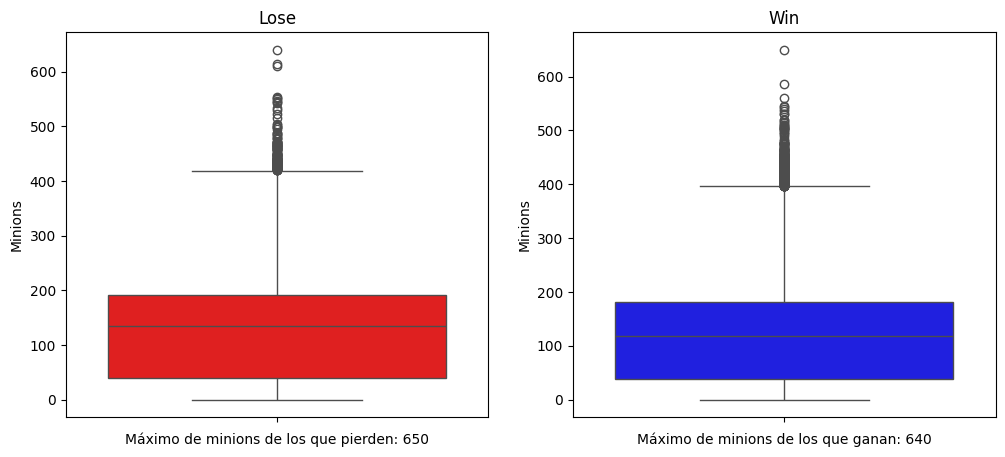

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data = todo.groupby("win")["totminionskilled"].apply(list)[1], ax = ax1, color = "red")
ax1.set_title("Lose")
ax1.set_ylabel("Minions")
ax1.set_xlabel(f"Máximo de minions de los que pierden: {max(todo.groupby("win")["totminionskilled"].apply(list)[0])}")
sns.boxplot(data = todo.groupby("win")["totminionskilled"].apply(list)[0], ax = ax2, color = "blue")
ax2.set_title("Win")
ax2.set_ylabel("Minions")
ax2.set_xlabel(f"Máximo de minions de los que ganan: {max(todo.groupby("win")["totminionskilled"].apply(list)[1])}")

#### Para ver que tan relacionadas están cada variable con la probabilidad de victoria "win", podemos hacer un .corr()

In [46]:
todo.corr(numeric_only= True)

,queueid,duration,matchid,player,win,kills,deaths,assists,largestkillingspree,pentakills,...,champlvl,wardsplaced,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
queueid,1.000000,-0.041705,0.187919,0.000026,-0.000027,-0.020975,-0.029587,-0.024516,-0.008934,-0.000531,...,-0.033321,0.025618,0.000009,-0.001132,-0.002619,0.000303,0.009872,-0.002966,0.010116,-0.011173
duration,-0.041705,1.000000,-0.019864,-0.000007,0.000003,0.386057,0.545926,0.526153,0.208505,0.012848,...,0.878186,0.483861,-0.000006,0.034132,0.083617,0.132688,0.290479,0.101034,0.426170,0.414354
matchid,0.187919,-0.019864,1.000000,0.000005,-0.000005,-0.011883,-0.016769,-0.010538,-0.005863,0.000293,...,-0.015593,0.002679,0.000002,-0.000096,-0.000371,-0.000718,0.001063,-0.001286,0.002269,-0.006087
player,0.000026,-0.000007,0.000005,1.000000,-0.026213,-0.004234,0.007682,-0.007787,-0.006736,-0.000709,...,0.000682,0.002970,0.870388,-0.023276,-0.029786,-0.027168,0.026885,0.001806,0.027241,0.002366
win,-0.000027,0.000003,-0.000005,-0.026213,1.000000,0.259825,-0.366113,0.303852,0.312430,0.031827,...,0.180538,0.030273,-0.030119,0.185990,0.418271,0.770636,0.434057,0.343203,0.415798,0.497921
kills,-0.020975,0.386057,-0.011883,-0.004234,0.259825,1.000000,0.169685,0.079023,0.808950,0.100794,...,0.539118,-0.035225,-0.006012,0.087794,0.167294,0.281101,0.230976,0.153545,0.268940,0.315976
deaths,-0.029587,0.545926,-0.016769,0.007682,-0.366113,0.169685,1.000000,0.151525,-0.130608,-0.002630,...,0.396814,0.171049,0.008390,-0.086053,-0.145083,-0.237633,-0.011502,-0.106149,0.078050,0.006911
assists,-0.024516,0.526153,-0.010538,-0.007787,0.303852,0.079023,0.151525,1.000000,0.020116,-0.008437,...,0.465096,0.516561,-0.007907,0.071779,0.143303,0.320083,0.305653,0.146290,0.373474,0.374211
largestkillingspree,-0.008934,0.208505,-0.005863,-0.006736,0.312430,0.808950,-0.130608,0.020116,1.000000,0.093455,...,0.402206,-0.077636,-0.008583,0.093237,0.199498,0.313394,0.198188,0.178031,0.197886,0.273945
pentakills,-0.000531,0.012848,0.000293,-0.000709,0.031827,0.100794,-0.002630,-0.008437,0.093455,1.000000,...,0.029523,-0.009563,-0.000400,0.004894,0.012700,0.028018,0.017160,0.011442,0.018529,0.021622


#### También podríamos hacer un heatmap para ver las correlaciones de las variables que queramos, con mejor visibilidad

In [47]:
numericos = todo[["win","kills", "deaths", "totdmgtochamp", "totminionskilled", "wardsplaced", "firstblood", "firstinhib", "firstdragon"]]

<Axes: >

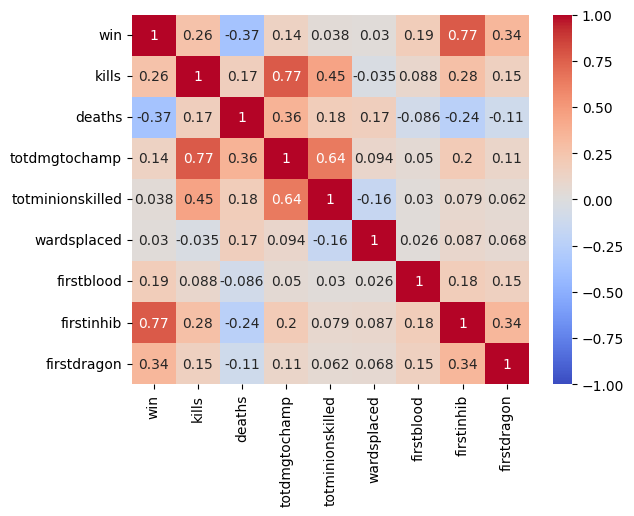

In [105]:
sns.heatmap(data = numericos.corr(), cmap = "coolwarm", annot = True, vmin = -1, vmax = 1)

#### Se observa cuantos minions hay que matar para ganar o perder

(-2.0, 300.0)

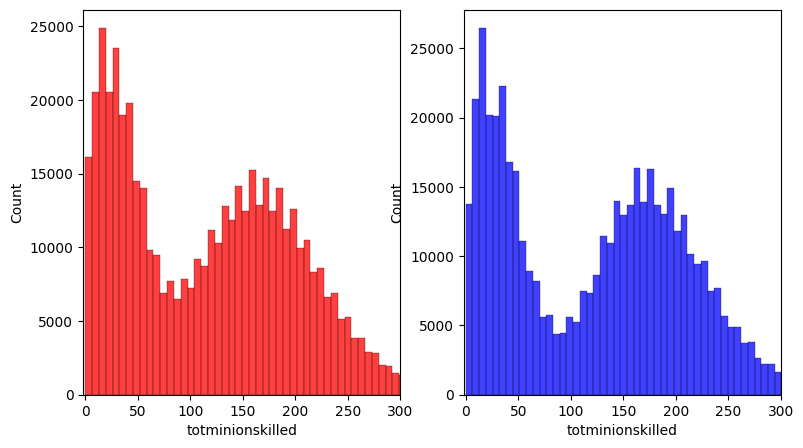

In [126]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))

sns.histplot(data = todo[todo["win"] == 0], x = "totminionskilled", bins = 100, ax = ax1, color = "red")
ax1.set_xlim(-2, 300)
sns.histplot(data = todo[todo["win"] == 1], x = "totminionskilled", bins = 100, ax = ax2, color = "blue")
ax2.set_xlim(-2, 300)

 Vemos que los minions no son demasiado determinantes para ganar una partida ya que tanto para victorias como para derrotas, la cantidad de minions asesinados es muy similar. En ocasiones se matan más minions al ganar, y en ocasiones se matan más minions al perder

#### Se crea un nuevo dataframe organizado por posición para ver si hay alguna que se juege más que el resto

In [50]:
broken_pos = todo["position"].value_counts().sort_values(ascending = False)

In [51]:
broken_pos = pd.DataFrame({"position": broken_pos.index, "veces_jugado": broken_pos.values})

Text(0.5, 1.0, 'Cantidad de veces que se ha jugado cada rol')

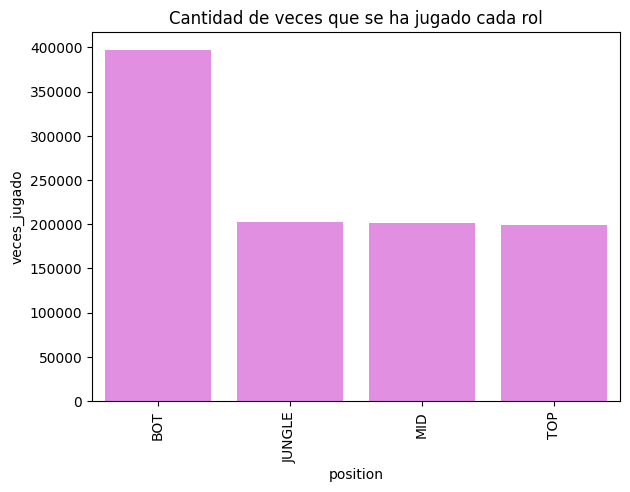

In [52]:
sns.barplot(data = broken_pos, x = "position", y = "veces_jugado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Cantidad de veces que se ha jugado cada rol")

Observamos que no hay una posición que se juegue más que el resto (Bot no cuenta ya que en su caso hay dos jugadores en esa posiciónn por lo que obtendría casi los mismos valores que el resto de posiciones si lo dividiesemos en dos)

#### Ahora vamos a agruparlos por posiciónn para comprobar cuantas de esas partidas se han perdido y cuantas se han gannado

In [53]:
todo.groupby(["position", "win"]).size().reset_index(name = "count").sort_values(by = "count", ascending = False)

,position,win,count
1,BOT,1,199464
0,BOT,0,197982
4,MID,0,101912
3,JUNGLE,1,101147
2,JUNGLE,0,100941
7,TOP,1,99738
5,MID,1,99651
6,TOP,0,99162


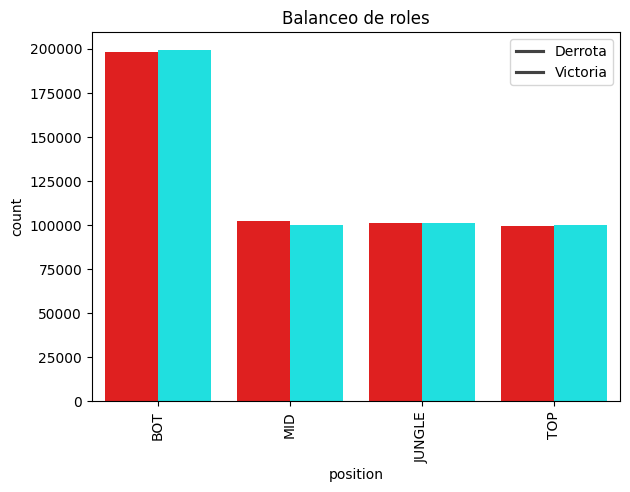

In [54]:
sns.barplot(data = todo.groupby(["position", "win"]).size().reset_index(name = "count").sort_values(by = "count", ascending = False), x = "position", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Balanceo de roles")
plt.legend(labels = ["Derrota", "Victoria"])

Nuevamente observamos que no hay una gran diferencia a la hora de comparar qué posición gana más partidas, quizá lo que si podemos sacar en claro es que mid es la menos "broken" o "op" ya que es la única que ha perdido más que ganado.

#### Seguimos el mismo proceso que conn las posiciones pero esta vez para los campeones

In [55]:
broken = todo["name"].value_counts().sort_values(ascending = False)

In [56]:
broken = pd.DataFrame({"name": broken.index, "veces_jugado": broken.values})

In [57]:
broken

,name,veces_jugado
0,Lee Sin,33768
1,Caitlyn,32717
2,Lucian,32435
3,Thresh,27597
4,Ahri,21032
...,...,...
131,Aurelion Sol,1160
132,Mordekaiser,1062
133,Corki,969
134,RekSai,913


Text(0.5, 1.0, 'Campeones ordenados por su uso')

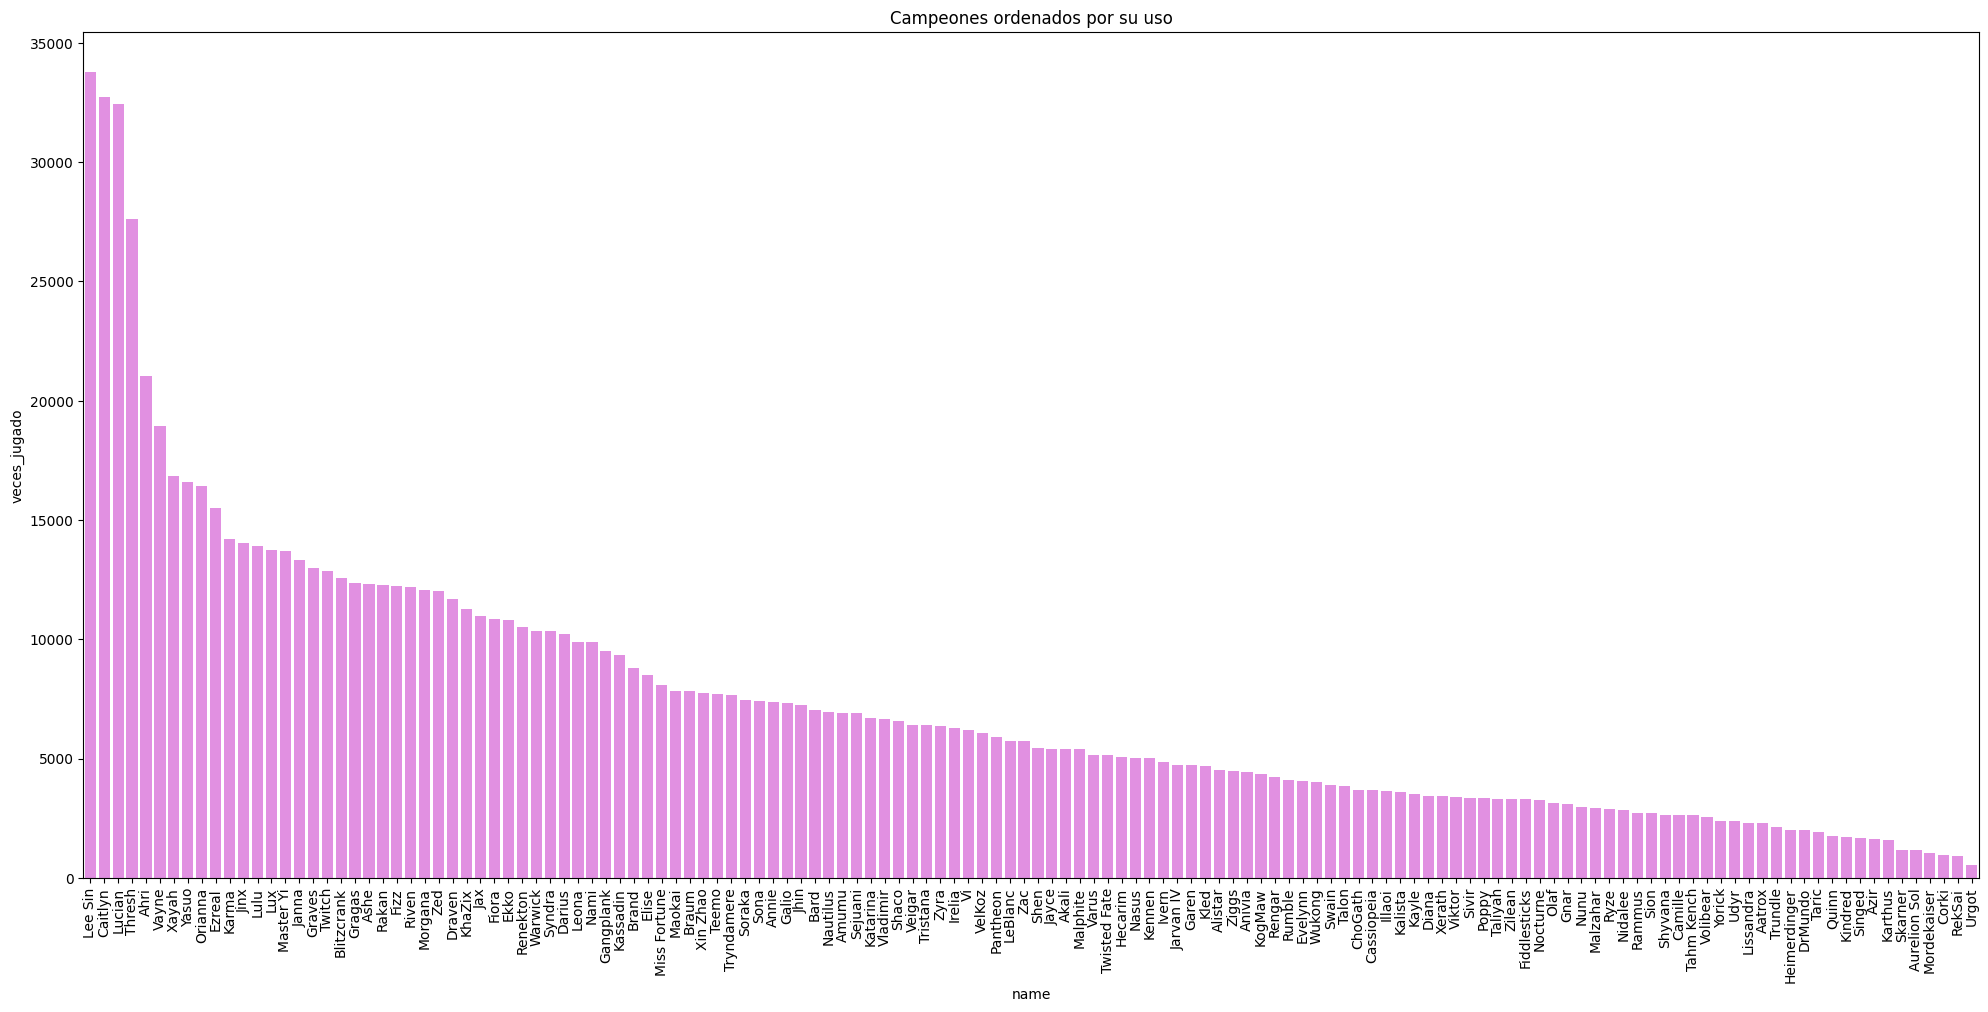

In [58]:
plt.figure(figsize = (20,10))
sns.barplot(data = broken, x = "name", y = "veces_jugado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Campeones ordenados por su uso")

#### Se obtiene un muestreo de los 10 campeones más jugados

Text(0.5, 1.0, 'Los 10 campeones más usados')

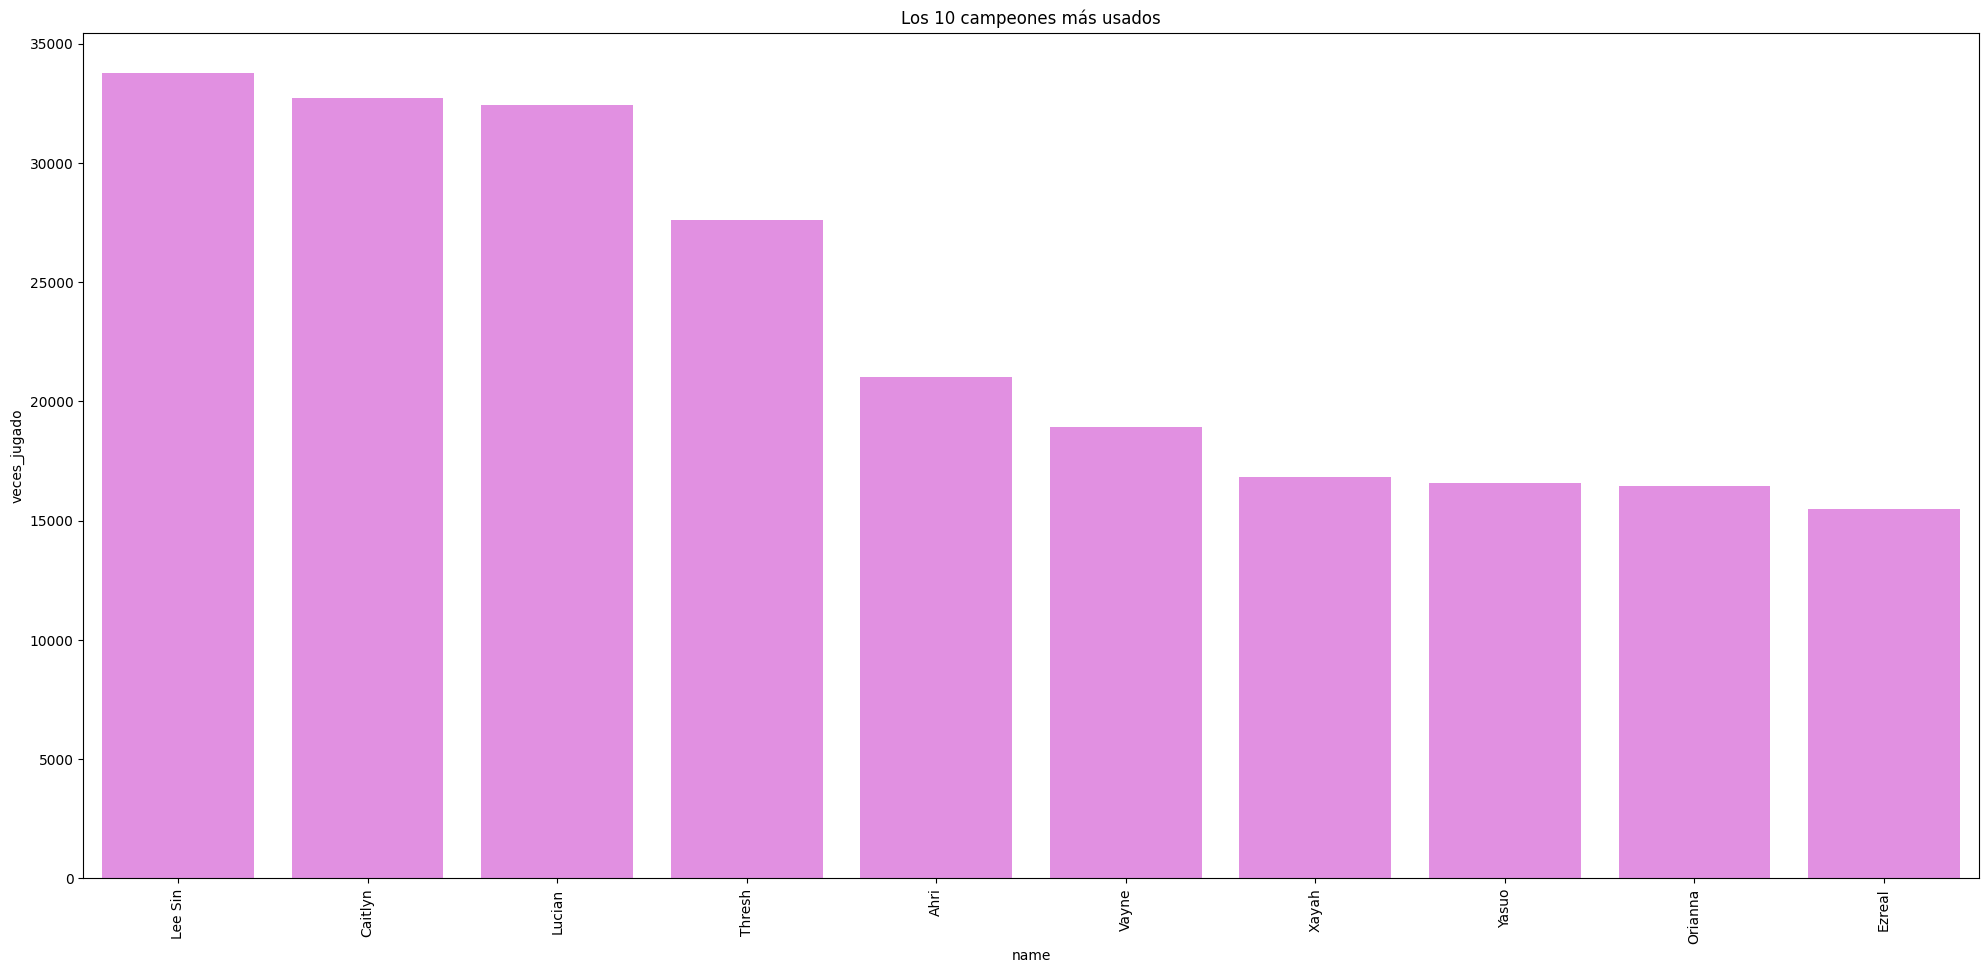

In [59]:
plt.figure(figsize = (20,10))
sns.barplot(data = broken, x = "name", y = "veces_jugado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlim(right = 9.5)
plt.title("Los 10 campeones más usados")

In [60]:
todo.groupby(["name", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "name"], ascending = False)

,name,win,count
118,Lee Sin,0,17371
29,Caitlyn,1,16674
119,Lee Sin,1,16397
125,Lucian,1,16313
124,Lucian,0,16122
...,...,...,...
170,RekSai,0,463
171,RekSai,1,450
37,Corki,1,448
230,Urgot,0,290


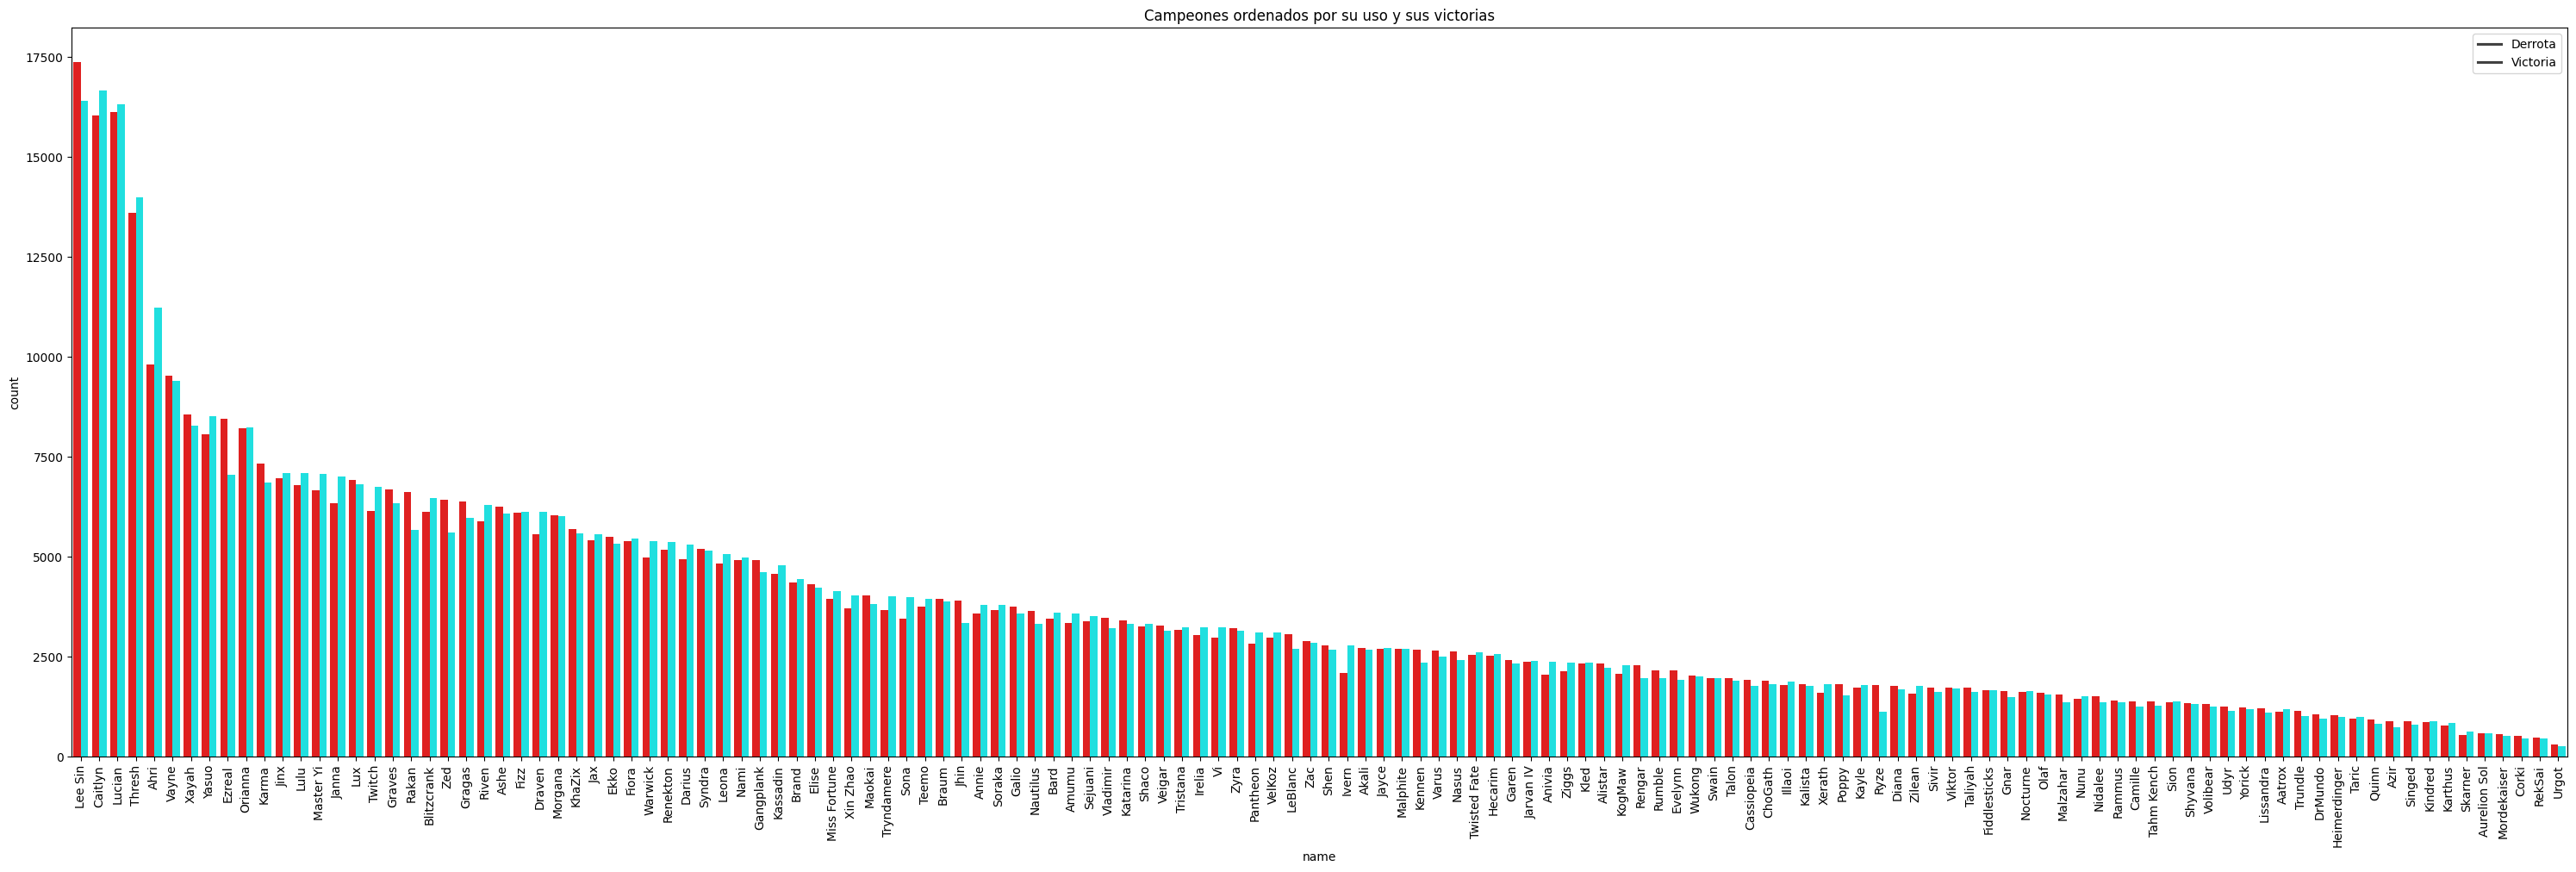

In [61]:
plt.figure(figsize = (30,10))
sns.barplot(data = todo.groupby(["name", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "name"], ascending = False), x = "name", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Campeones ordenados por su uso y sus victorias")
plt.legend(labels = ["Derrota", "Victoria"])

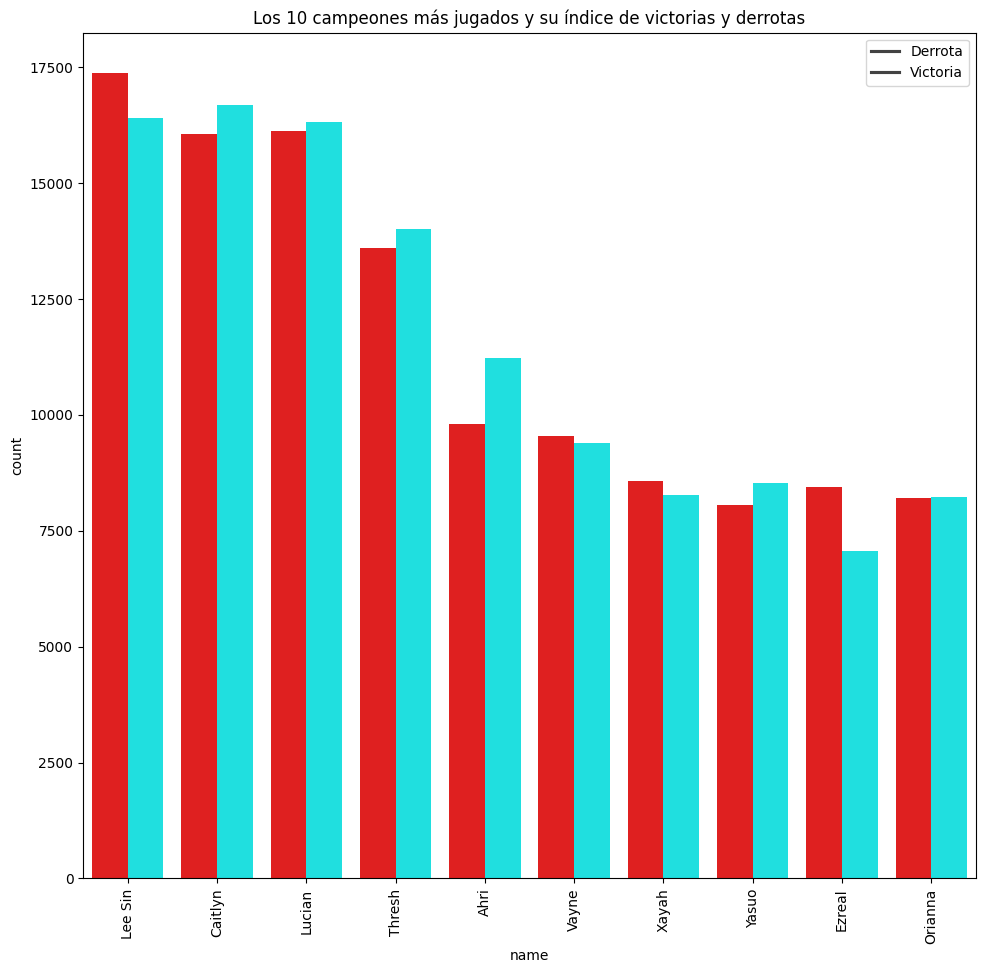

In [62]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["name", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "name"], ascending = False), x = "name", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlim(right = 9.5)
plt.title("Los 10 campeones más jugados y su índice de victorias y derrotas")
plt.legend(labels = ["Derrota", "Victoria"])

Aquí podemos observar que si bien el campeón más jugado/popular es Lee Sin, no es el más "broken" o "op" ya que esa posición le pertenece a Caitlyn debido a que tiene muchas más partidas ganadas y en cuanto a partidas jugadas tienen un valor bastate similar

#### Se sigue el mismo proceso, primero para los 3 items que se compran primero más usados y después para cada uno de ellos, es decir, primer objeto, segundo objeto y tercer objeto

In [63]:
broken_items = pd.concat([todo["item1"], todo["item2"], todo["item3"]], ignore_index = True)

In [64]:
broken_item = broken_items.value_counts().sort_values(ascending = False)

In [65]:
broken_item = pd.DataFrame({"item": broken_item.index, "veces_comprado": broken_item.values})

In [66]:
broken_item.drop(index = 0, inplace = True)

Text(0.5, 1.0, 'Campeones ordenados por su uso')

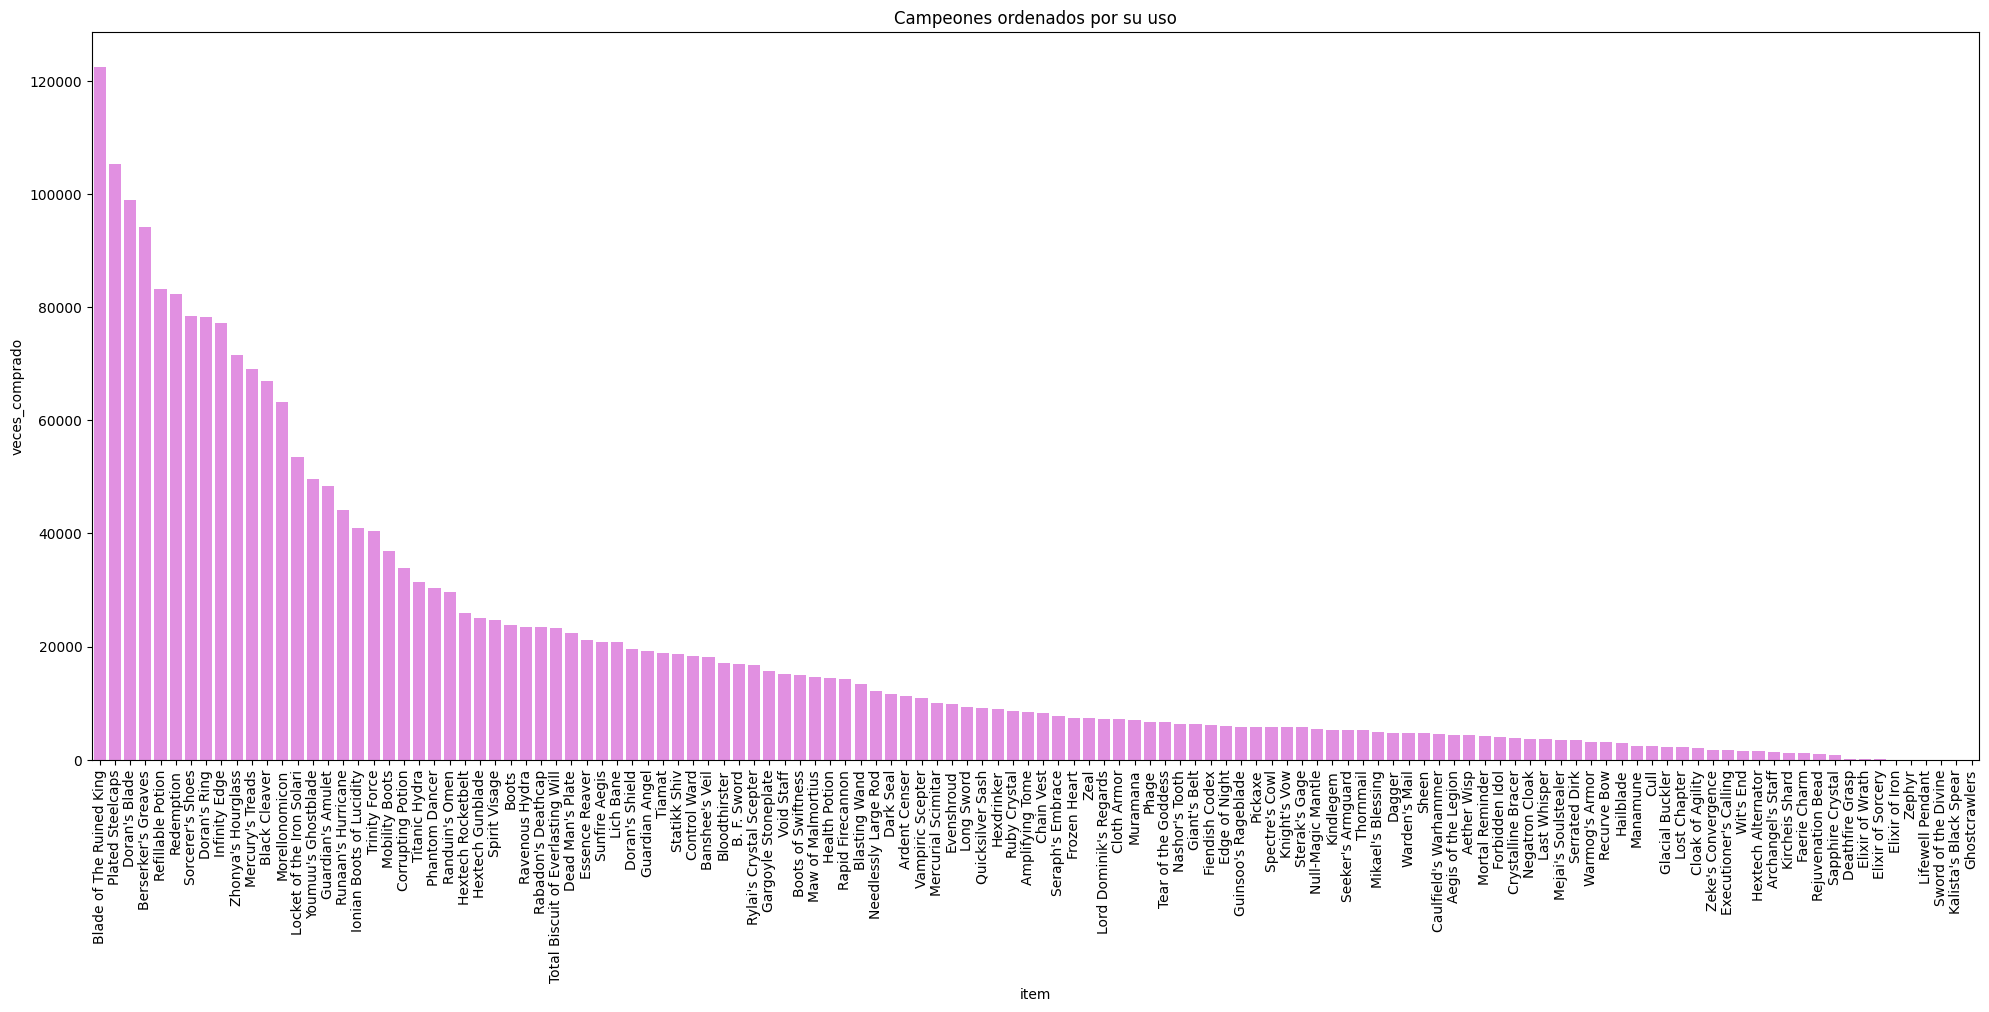

In [67]:
plt.figure(figsize = (20,10))
sns.barplot(data = broken_item, x = "item", y = "veces_comprado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Campeones ordenados por su uso")

Text(0.5, 1.0, 'Los 10 objetos más comprados')

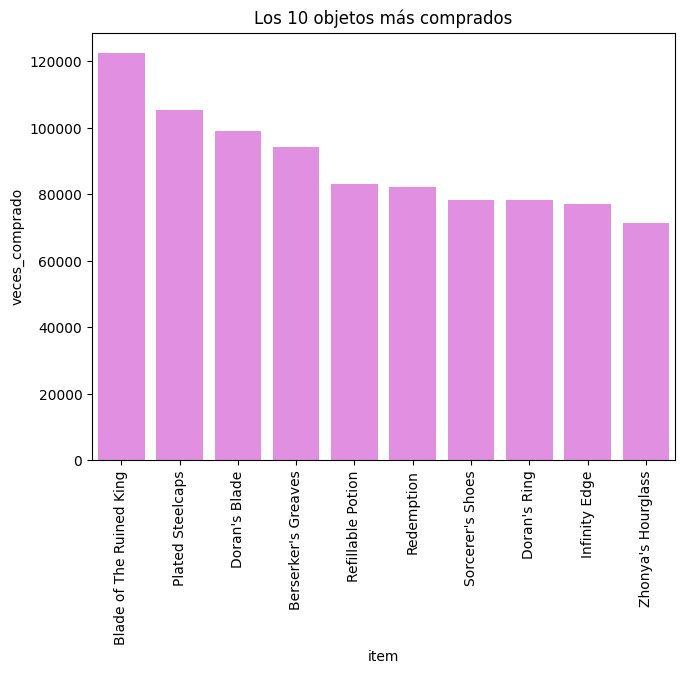

In [68]:
plt.figure(figsize = (7,7))
sns.barplot(data = broken_item, x = "item", y = "veces_comprado", color = "violet")
plt.xticks(rotation = 90)
plt.tight_layout()
plt.xlim(right = 9.5)
plt.title("Los 10 objetos más comprados")

Podemos observar que el item más comprado es la hoja del rey arruinado, superando incluso a los objetos iniciales, los cuales se compran todos los campeones en prácticamente todas las partidas.

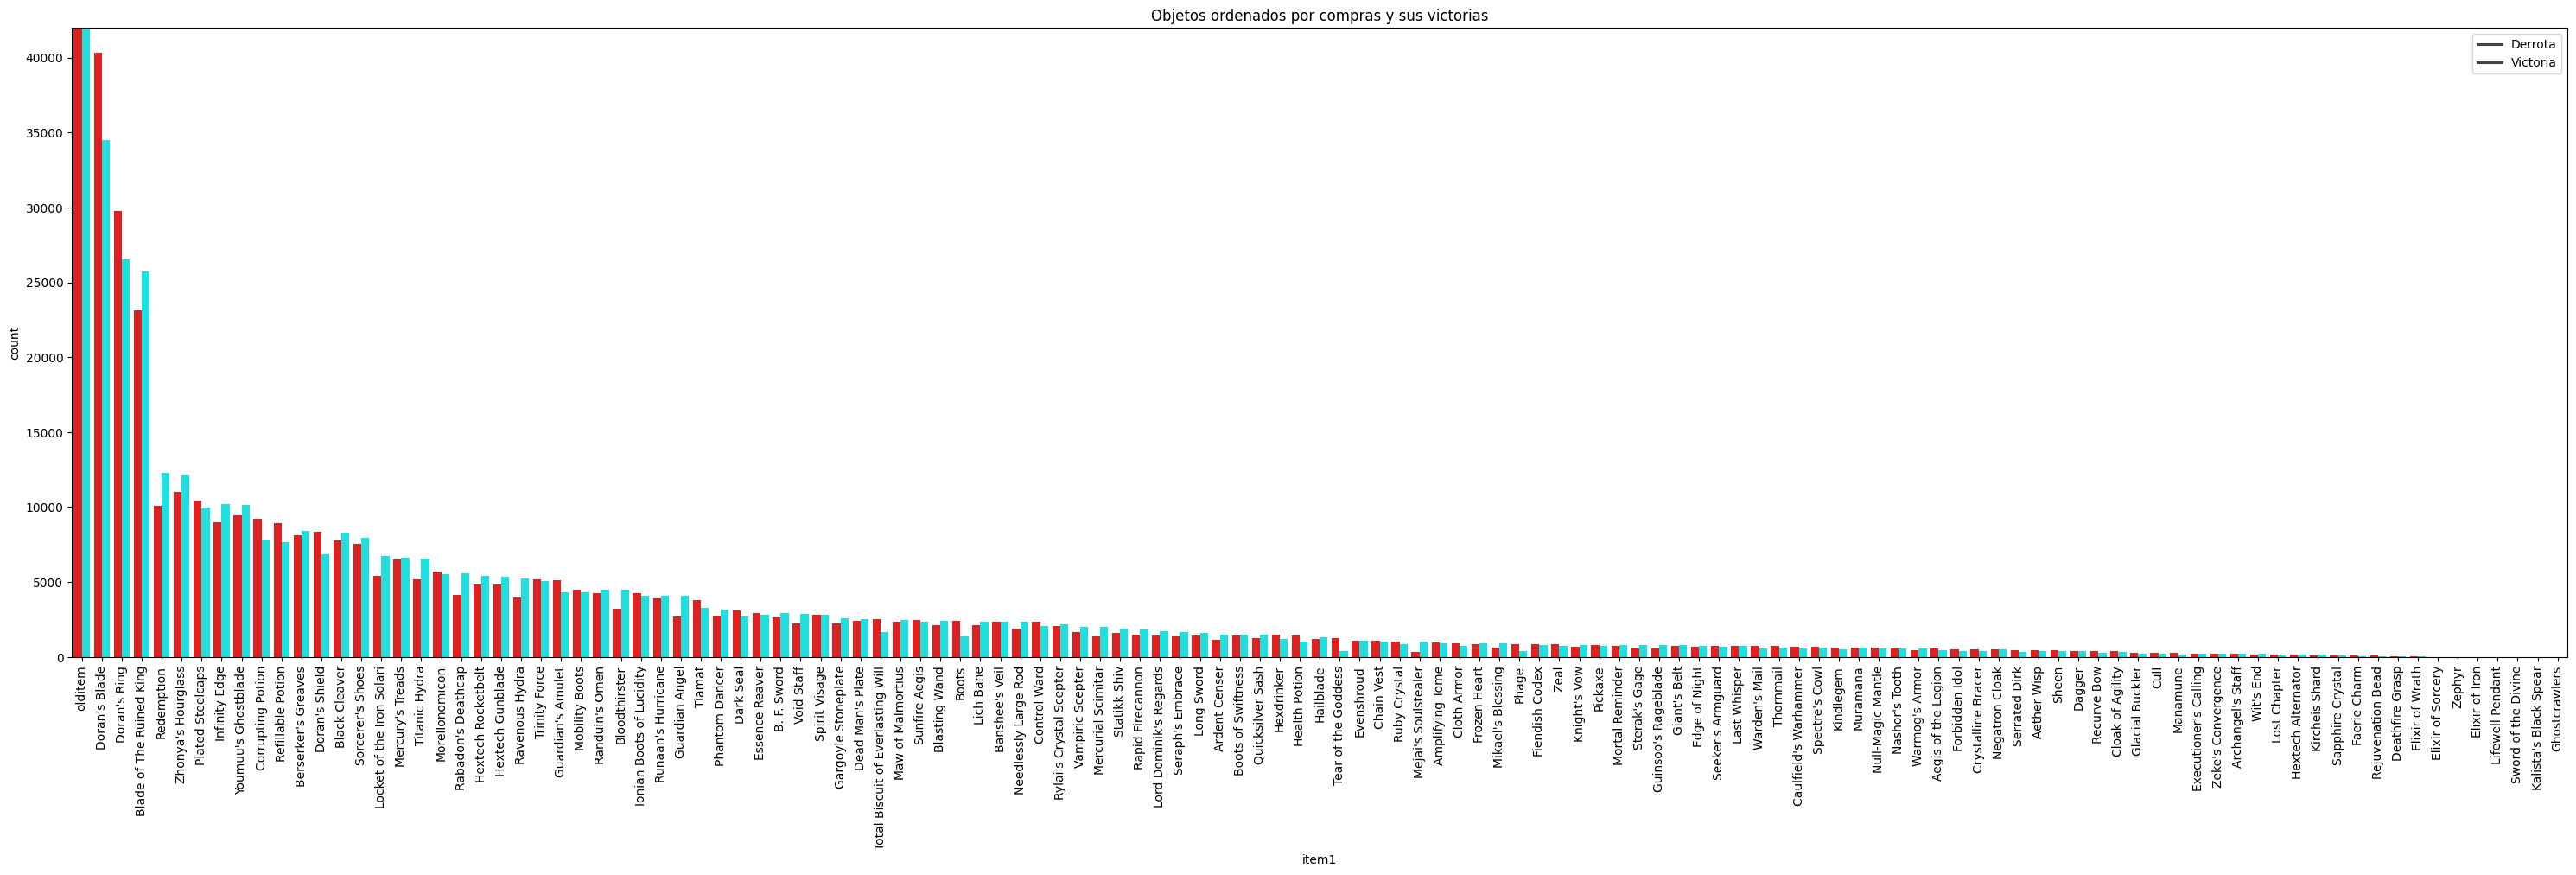

In [69]:
plt.figure(figsize = (30,10))
sns.barplot(data = todo.groupby(["item1", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item1"], ascending = False), x = "item1", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos ordenados por compras y sus victorias")
plt.ylim(top = 42000)
plt.legend(labels = ["Derrota", "Victoria"])

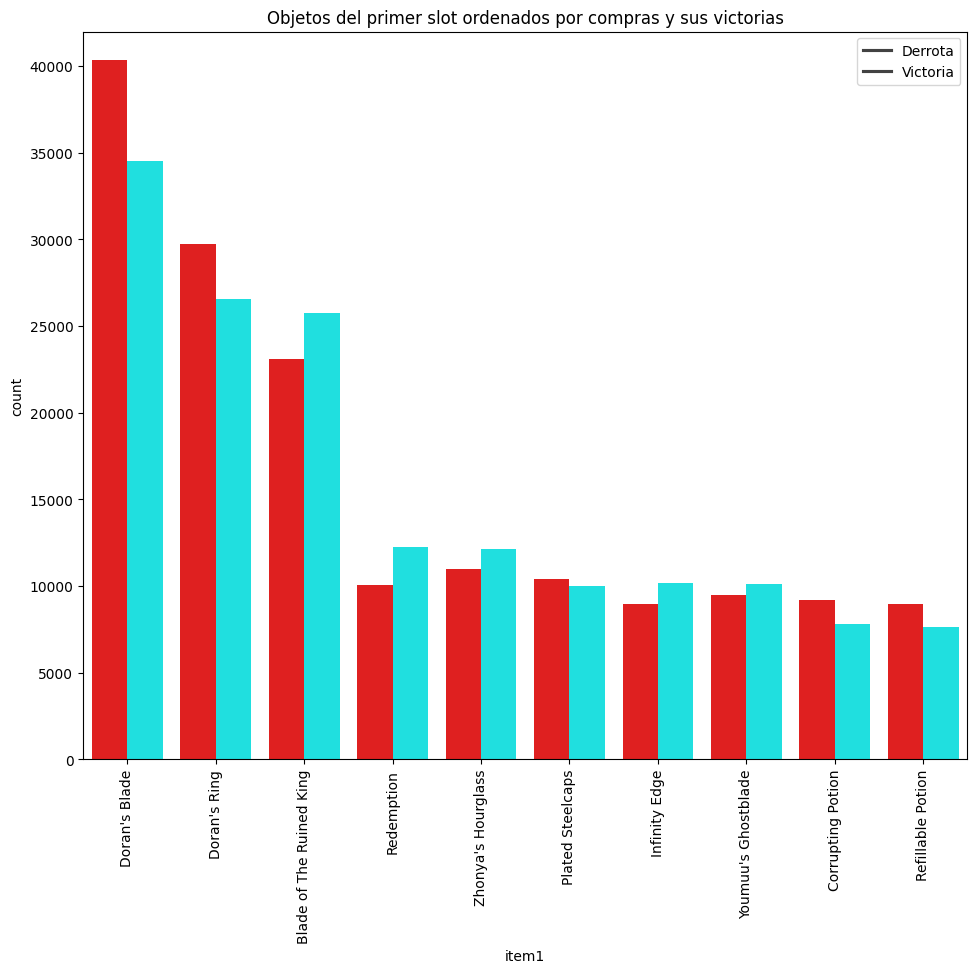

In [70]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["item1", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item1"], ascending = False), x = "item1", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos del primer slot ordenados por compras y sus victorias")
plt.ylim(top = 42000)
plt.xlim(left = 0.5, right = 10.5)
plt.legend(labels = ["Derrota", "Victoria"])

En esta gráfica observamos que los objetos más comprados para el primer slot son dos objetos iniciales, seguidos de la hoja del rey arruinado. En cuannto a la cantidad de victorias es lógico ver que los dos primeros objetos tengan menos victorias al pensar que son objetos iniciales que apenas aportan estadísticas.

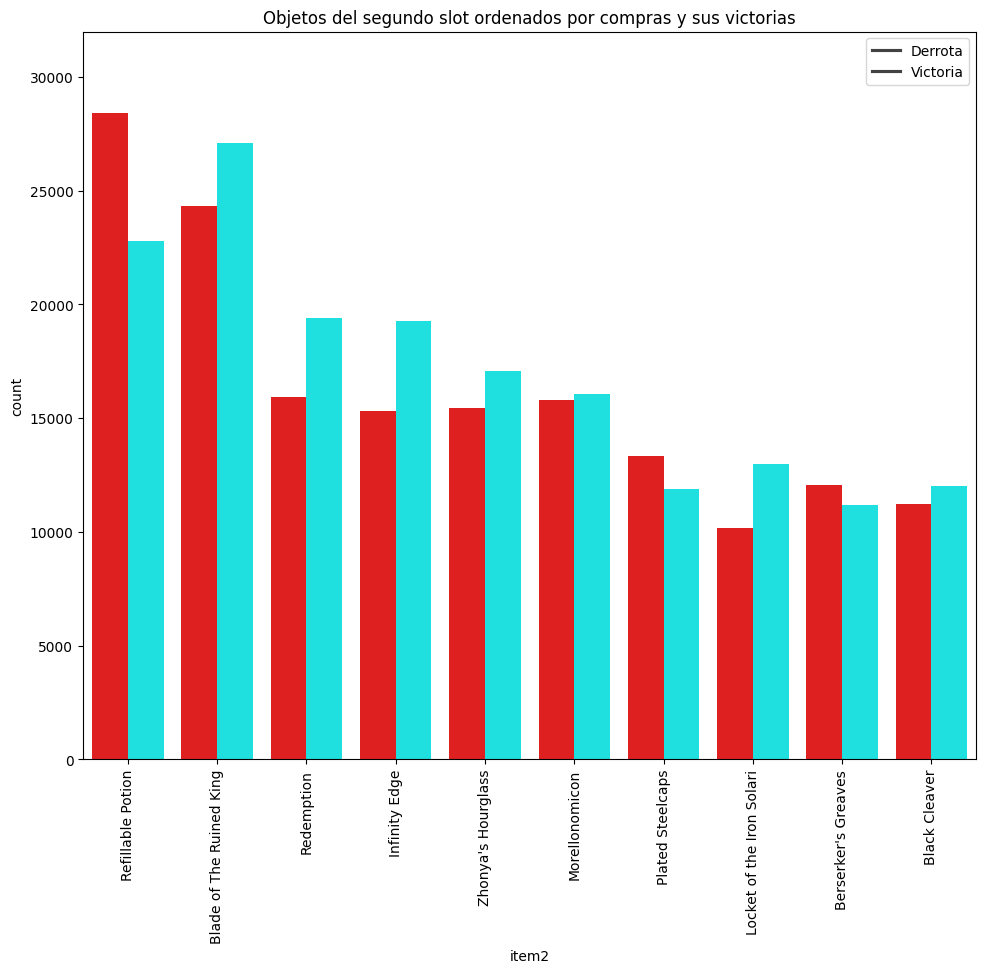

In [71]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["item2", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item2"], ascending = False), x = "item2", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos del segundo slot ordenados por compras y sus victorias")
plt.ylim(top = 32000)
plt.xlim(left = 0.5, right = 10.5)
plt.legend(labels = ["Derrota", "Victoria"])

En esta gráfica para el segundo slot de items, ocurre algo muy similar al primer slot ya que el objeto más popular en esta posición es una poción con menor nnúmero de victorias, seguido de la hoja del rey arruinado.

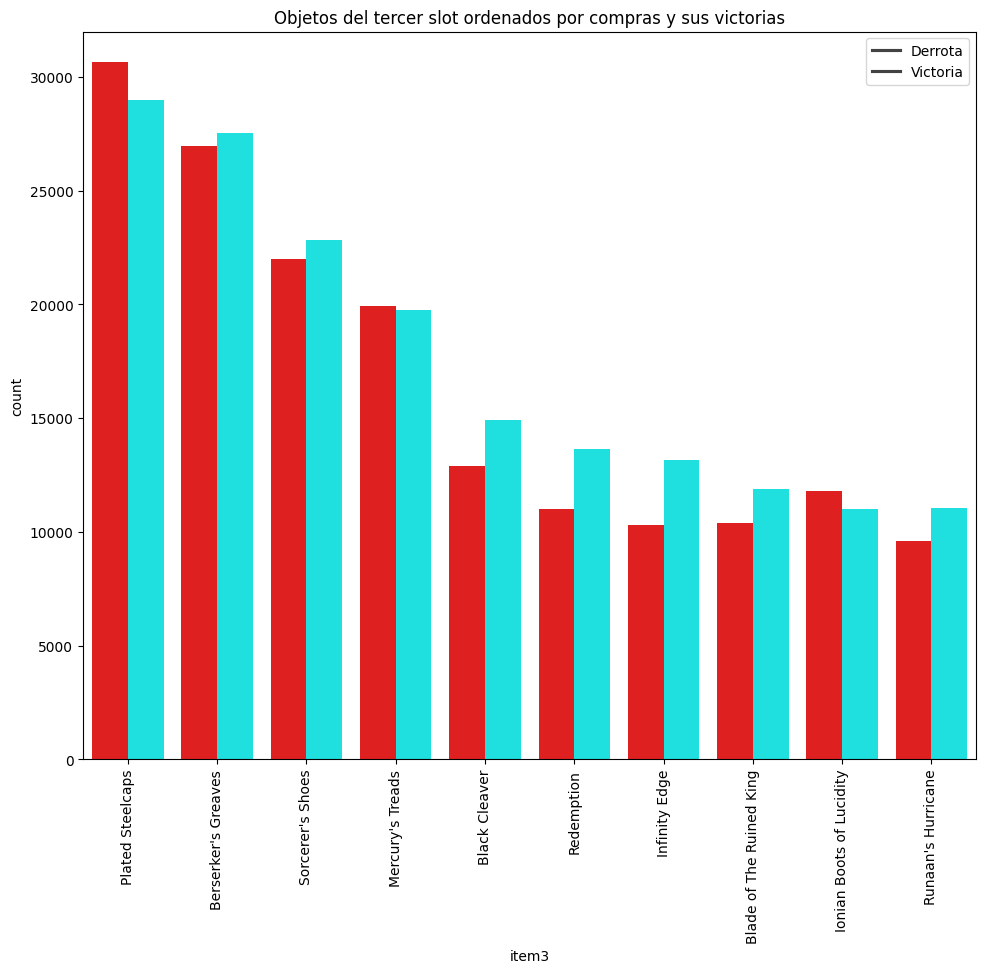

In [72]:
plt.figure(figsize = (10,10))
sns.barplot(data = todo.groupby(["item3", "win"]).size().reset_index(name = "count").sort_values(by = ["count", "item3"], ascending = False), x = "item3", y = "count", hue = "win", palette = ["red", "#00ffff"])
plt.xticks(rotation = 90)
plt.tight_layout()
plt.title("Objetos del tercer slot ordenados por compras y sus victorias")
plt.ylim(top = 32000)
plt.xlim(left = 0.5, right = 10.5)
plt.legend(labels = ["Derrota", "Victoria"])

Por último con los objetos, vemos que en esta tercera posición los objetos que más se compran son los diferentes tipos de botas los cuales al igual que con los objetos iniciales y las pociones, no tienen un gran impacto en la probabilidad de ganar, sin embargo, si vemos todos los objetos que no son botas, sí vemos como tienen un mayor número de partidas ganadas

Conclusión de los objetos: ¿Ayudan a ganar la partida?
Sí, siempre y cuando la partida dure lo suficiente como para haber vendido los objetos inniciales y haber comprado un objeto que realmente mejore las estadísticas.
¿Hay alguno que este roto?
Sí, la hoja del rey arruinado

#### Creamos un gráfico para observar las veces que se gana o se pierde en función de las veces que se muere y de las veces que se mata

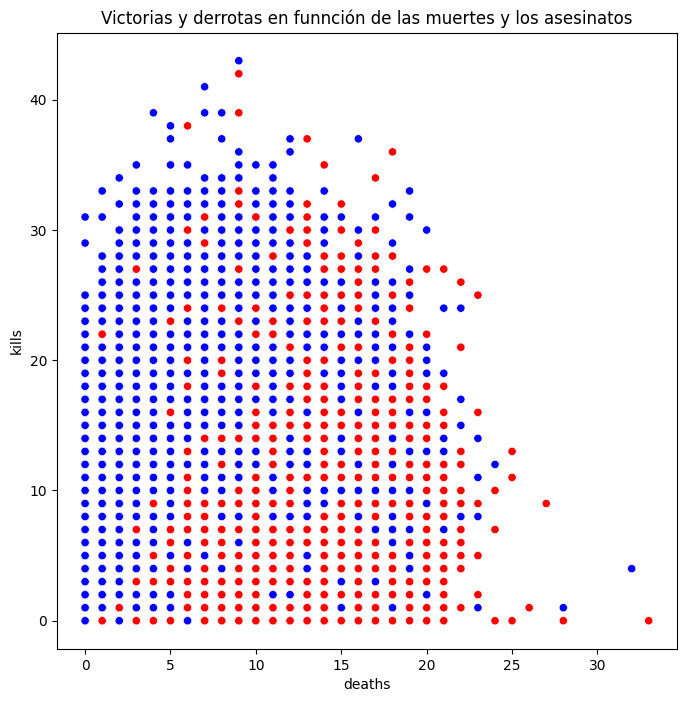

In [73]:
plt.figure(figsize = (8, 8))
sns.scatterplot(data = todo, x = "deaths", y = "kills", hue = "win", palette = ["red", "blue"], legend = False)
plt.title("Victorias y derrotas en funnción de las muertes y los asesinatos")
plt.show()

Podemos ver como a medida que amuenta el número de asesinatos, y el número de muertes se mantiene bajo, es más probable ganar, y si aumenta el número de muertes y el número de asesinatos se mantiene bajo, es más probable perder.

In [74]:
todo[(todo['win'] == 1) & (todo["dragonkills"] < 5)]

,platformid,queueid,duration,matchid,player,position,win,kills,deaths,assists,...,item2,item3,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
5,EUW1,420,1909,10,6,JUNGLE,1,3,3,9,...,Mercury's Treads,Trinity Force,200,1,0,1,1,1,1,3
6,EUW1,420,1909,10,7,TOP,1,4,5,11,...,Gargoyle Stoneplate,Sunfire Aegis,200,1,0,1,1,1,1,3
7,EUW1,420,1909,10,8,MID,1,13,4,8,...,Morellonomicon,Rabadon's Deathcap,200,1,0,1,1,1,1,3
8,EUW1,420,1909,10,9,BOT,1,15,3,9,...,Infinity Edge,Berserker's Greaves,200,1,0,1,1,1,1,3
9,EUW1,420,1909,10,10,BOT,1,4,5,19,...,olditem,olditem,200,1,0,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999987,EUW1,420,1249,103125,1,MID,1,2,4,10,...,Morellonomicon,Sorcerer's Shoes,100,1,1,0,0,1,0,2
999988,EUW1,420,1249,103125,2,JUNGLE,1,7,1,4,...,Plated Steelcaps,Youmuu's Ghostblade,100,1,1,0,0,1,0,2
999989,EUW1,420,1249,103125,3,BOT,1,4,2,13,...,Mobility Boots,olditem,100,1,1,0,0,1,0,2
999990,EUW1,420,1249,103125,4,TOP,1,6,4,0,...,olditem,Plated Steelcaps,100,1,1,0,0,1,0,2


#### Se establece un dataframe para las victorias y otro para las derrotas organizado por el número de kills de dragones

In [75]:
victorias = todo[(todo['win'] == 1) & (todo["dragonkills"] < 5)].groupby('dragonkills').size()
derrotas = todo[(todo['win'] == 0) & (todo["dragonkills"] < 5)].groupby('dragonkills').size()

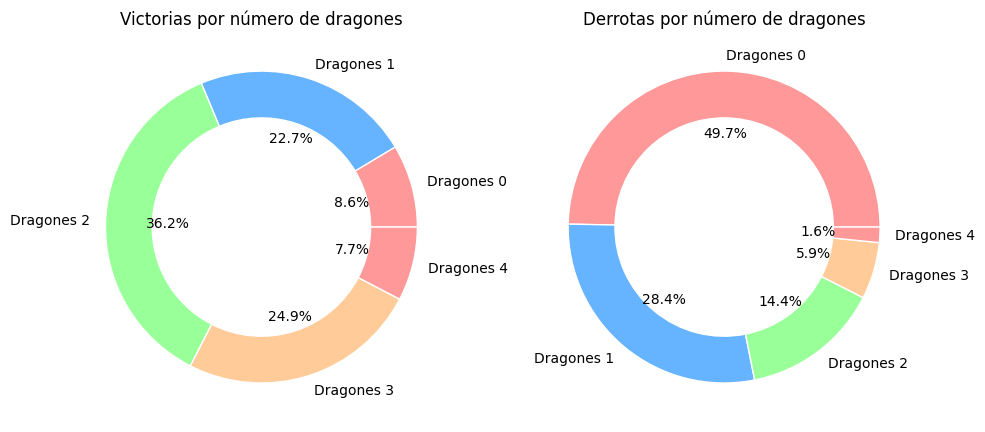

In [76]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.pie( victorias, labels=[f'Dragones {i}' for i in victorias.index], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], wedgeprops={'width': 0.3, 'edgecolor': 'white'})
plt.title('Victorias por número de dragones')

plt.subplot(1, 2, 2) 
plt.pie( derrotas, labels=[f'Dragones {i}' for i in derrotas.index], autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'], wedgeprops={'width': 0.3, 'edgecolor': 'white'})
plt.title('Derrotas por número de dragones')

plt.tight_layout() 
plt.show()

Tras ver esta gráfica observamos que la mayoría de partidas se ganan cuando se hacen dos dragones, y se pierden cuando no se hacen ninguno. Por lo que sí, podríamos decir que el número de dragones, influye a la probabilidad de victoria

#### Se sacan las estadísticas de cuartiles, media, mediana... del tiempo que duran las partidas medido en segundos

Text(0, 0.5, 'Duración en segundos')

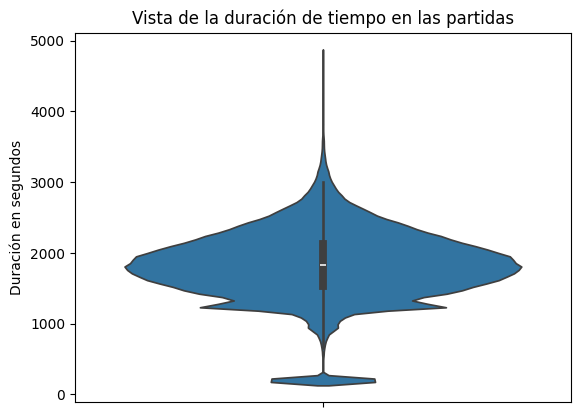

In [77]:
sns.violinplot(data = todo, y = "duration")
plt.title("Vista de la duración de tiempo en las partidas")
plt.ylabel("Duración en segundos")


Vemos que la mayoría de partidas dura aproximadamente 2000 segundos (33 minutos).
También observamos que hay partidas que al poco de empezar se acaban. Esto se debe a que hay una función en la que si al empezar la partida hay un jugador "afk" es decir, que no está jugando, se les da la opción al resto del equipo de rendirse y acabar la partida.

#### Se sacan las estadísticas de cuartiles, media, mediana... del nivel de los campeones

Text(0, 0.5, 'Niveles')

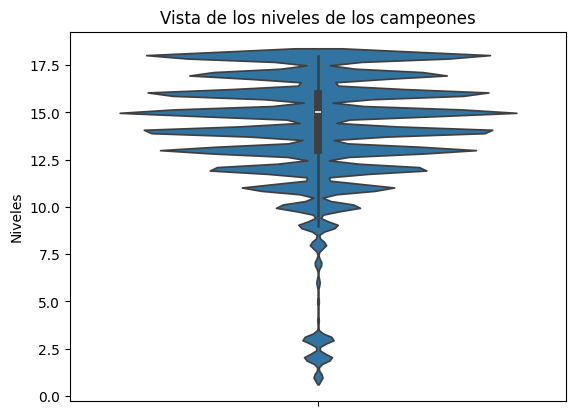

In [78]:
sns.violinplot(data = todo, y = "champlvl")
plt.title("Vista de los niveles de los campeones")
plt.ylabel("Niveles")

Observamos que pese a que todas las partidas acaben más o menos a los 33 minutos, hay mucha diferencia el cuanto al nivel de los campeones, y que el nivel más probable con el que se acabe la partida es el 15.

#### Se sacan las estadísticas de cuartiles, media, mediana... del número de asesinatos seguidos conseguidos sin morir

Text(0, 0.5, 'Asesinatos seguidos')

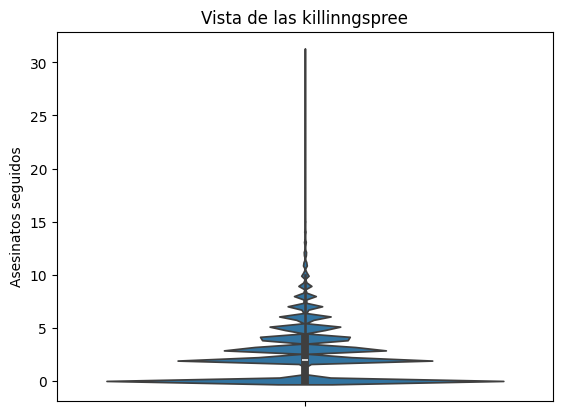

In [79]:
sns.violinplot(data = todo, y = "largestkillingspree")
plt.title("Vista de las killinngspree")
plt.ylabel("Asesinatos seguidos")

Podemos observar como la mayoría no se hacen racha de asesinatos, y tasmbién que en alguna partida, dicha racha de asesinatos asciende hasta 30. 30 asesinatos sin morir se podría traducir a o bien, un grandísimo nivel por parte del jugador o, lo más lógico, los enemigos eran bots.

#### Hacemos el mismo proceso que hemos hecho con los dragones para el número de torres tiradas, con la diferencia que a partir de las 5 torres tiradas se acumulan los valores en un mismo triángulo

In [80]:
victorias = todo[todo['win'] == 1].groupby('turretkills').size()
derrotas = todo[todo['win'] == 0].groupby('turretkills').size()

In [81]:
sns.set_palette("dark")

In [82]:
torres_totales = pd.DataFrame(todo[todo["turretkills"] > 3].groupby("win")["turretkills"].count(), index = None)

In [83]:
torres_totales["win"] = [0, 1]

In [84]:
torres_totales

,turretkills,win
win,,
0,3254,0
1,42102,1


In [85]:
torres = pd.concat([todo, torres_totales], ignore_index = True)

In [86]:
todo[(todo["turretkills"] <= 3) & (todo["win"] == 1)]

,platformid,queueid,duration,matchid,player,position,win,kills,deaths,assists,...,item2,item3,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
5,EUW1,420,1909,10,6,JUNGLE,1,3,3,9,...,Mercury's Treads,Trinity Force,200,1,0,1,1,1,1,3
6,EUW1,420,1909,10,7,TOP,1,4,5,11,...,Gargoyle Stoneplate,Sunfire Aegis,200,1,0,1,1,1,1,3
7,EUW1,420,1909,10,8,MID,1,13,4,8,...,Morellonomicon,Rabadon's Deathcap,200,1,0,1,1,1,1,3
8,EUW1,420,1909,10,9,BOT,1,15,3,9,...,Infinity Edge,Berserker's Greaves,200,1,0,1,1,1,1,3
9,EUW1,420,1909,10,10,BOT,1,4,5,19,...,olditem,olditem,200,1,0,1,1,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999987,EUW1,420,1249,103125,1,MID,1,2,4,10,...,Morellonomicon,Sorcerer's Shoes,100,1,1,0,0,1,0,2
999988,EUW1,420,1249,103125,2,JUNGLE,1,7,1,4,...,Plated Steelcaps,Youmuu's Ghostblade,100,1,1,0,0,1,0,2
999989,EUW1,420,1249,103125,3,BOT,1,4,2,13,...,Mobility Boots,olditem,100,1,1,0,0,1,0,2
999990,EUW1,420,1249,103125,4,TOP,1,6,4,0,...,olditem,Plated Steelcaps,100,1,1,0,0,1,0,2


In [87]:
victorias = torres[(torres['win'] == 1) & ((torres["turretkills"] <= 3) | (torres["turretkills"] > 10))].groupby('turretkills').size()
derrotas = torres[(torres['win'] == 0) & ((torres["turretkills"] <= 3) | (torres["turretkills"] > 10))].groupby('turretkills').size()

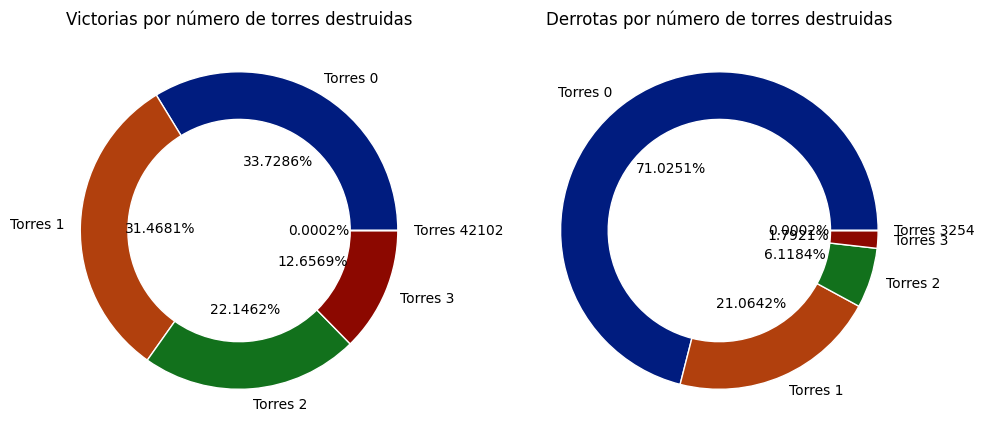

In [88]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  
plt.pie( victorias, labels=[f'Torres {i}' for i in victorias.index], autopct='%1.4f%%', pctdistance = 0.5, wedgeprops={'width': 0.3, 'edgecolor': 'white'})
plt.title('Victorias por número de torres destruidas')

plt.subplot(1, 2, 2) 
plt.pie( derrotas, labels=[f'Torres {i}' for i in derrotas.index], autopct='%1.4f%%', pctdistance = 0.5, wedgeprops={'width': 0.3, 'edgecolor': 'white'})
plt.title('Derrotas por número de torres destruidas')

plt.tight_layout() 
plt.show()

Curiosamente vemos que el mayor número de victorias se consigue sin haber tirado ninguna torre. Con las derrotas pasa lo mismo, sin embargo, es más lógico en ese caso.
También vemos que el número de victorias y de derrotas es igual habiendo tirado más de 3 torres.

#### Al ver que la mayoría de partidas se ganan sin haber tirado ningunna torre, se busca ver qué cantidad de daño se le ha hecho a esas torres que no se han tirado

Text(0.5, 1.0, 'Daño a torres para partidas ganadas en las que no se tira ninguna')

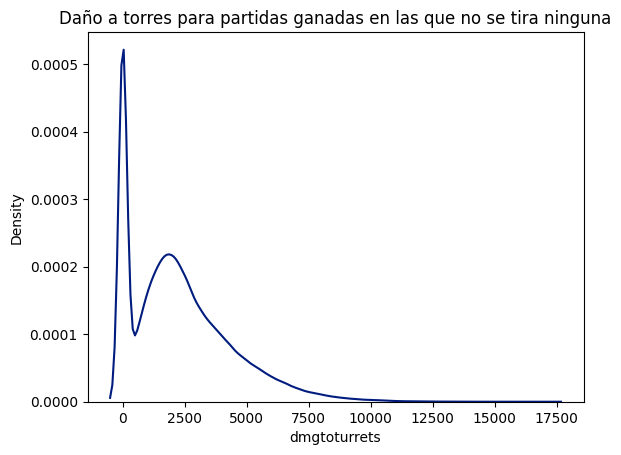

In [89]:
sns.kdeplot(data = todo[todo["turretkills"] == 1], x = "dmgtoturrets")
plt.title("Daño a torres para partidas ganadas en las que no se tira ninguna")

Observamos que la mayoría de partidas que se ganan sin tirar ninguna torre, tampoco se le hace ningúnn daño a dichas torres, esto se debe a las rendiciones mencionadas anteriormente.
También vemos como no todas las partidas en las que no se tiran torres es porque se hayan rendido al principio, también se ha hecho daño, mayormente entre 2500 y 5000.
¿A qué se debe el hecho de ganar la partida sin tirar torres si he dicho que es necesario tirar mínimo 5 para ganar? A que a partir del minuto 15, o 20, ambos equipos pueden iniciar una votación para rendirse, y en caso de dicha votación ser aceptada, perderán inmediatamente.

In [93]:
todo[:100000]

,platformid,queueid,duration,matchid,player,position,win,kills,deaths,assists,...,item2,item3,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,baronkills,dragonkills
0,EUW1,420,1909,10,1,JUNGLE,0,6,10,1,...,Health Potion,Mercury's Treads,100,0,1,0,0,0,0,0
1,EUW1,420,1909,10,2,BOT,0,0,2,12,...,Mercury's Treads,Locket of the Iron Solari,100,0,1,0,0,0,0,0
2,EUW1,420,1909,10,3,BOT,0,7,8,5,...,Bloodthirster,Berserker's Greaves,100,0,1,0,0,0,0,0
3,EUW1,420,1909,10,4,TOP,0,5,11,2,...,Trinity Force,Maw of Malmortius,100,0,1,0,0,0,0,0
4,EUW1,420,1909,10,5,MID,0,2,8,2,...,Needlessly Large Rod,olditem,100,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,EUW1,420,1486,12629,9,MID,1,9,3,6,...,Tear of the Goddess,Ionian Boots of Lucidity,200,1,1,1,0,1,0,2
99996,EUW1,420,1486,12629,10,JUNGLE,1,6,2,10,...,Tiamat,Mercury's Treads,200,1,1,1,0,1,0,2
99997,EUW1,420,2180,12630,1,TOP,1,6,11,5,...,Void Staff,Nashor's Tooth,100,0,0,1,1,0,1,1
99998,EUW1,420,2180,12630,2,BOT,1,11,8,16,...,Rylai's Crystal Scepter,Morellonomicon,100,0,0,1,1,0,1,1


#### Se obtiene una gráfica para visualizar las victorias y derrotas en función de la cantidad de wards colocados y la cantidad de veces que dichos wards revelan a un rival

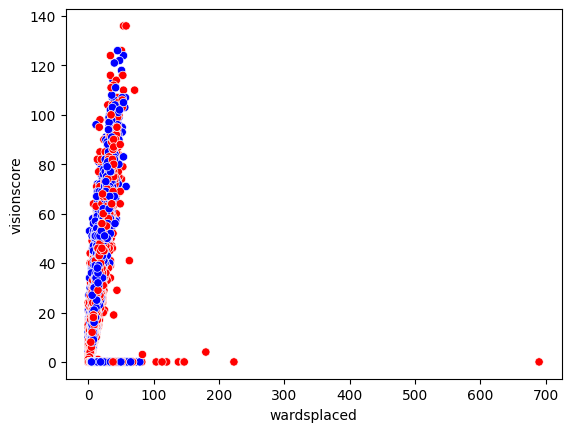

In [104]:
sns.scatterplot(data = todo[:100000], y = "visionscore", x = "wardsplaced", hue = "win", legend = False, palette = ["red", "blue"])
plt.show()

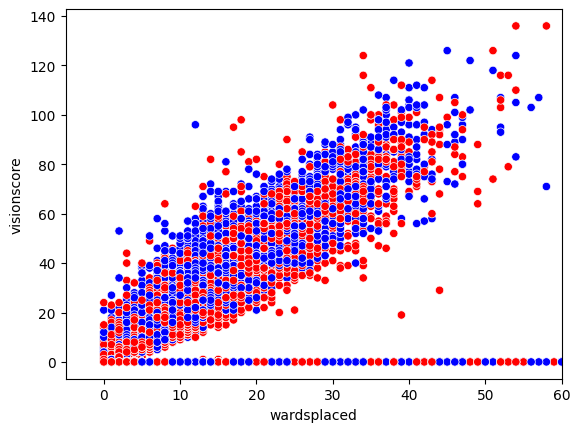

In [103]:
sns.scatterplot(data = todo[:100000], y = "visionscore", x = "wardsplaced", hue = "win", legend = False, palette = ["red", "blue"])
plt.xlim(left = -5, right = 60)
plt.show()

En dicho gráfico podemos observar que no hay un patrón a seguir, por lo que la visión no indica mayor probabilidad de victoria.
También podemos ver ciertos valores extraños, como que se hayan colocado casi 700 wards y dichos wards no hayan revelado a ningún enemigo. (En cualquier otra situación sería lógico pensar que eso se debe a que falta información sobre la visionscore para ese caso. Pero proviniendo del lol, es mejor pensar que había un "troll" en el equipo que lo único que hizo fue colocar wards en un sitio seguro para él al que los enemigos no podían acceder)